Load plk files to system

In [8]:
import pandas as pd

train_data = pd.read_pickle("./data/en/train.pkl")
val_data = pd.read_pickle("./data/en/val.pkl")
test_data = pd.read_pickle("./data/en/test.pkl")

Show how many rows and columns in each file

In [3]:
print("Train data shape: ", train_data.shape)
print("Val data shape: ", val_data.shape)
print("Test data shape: ", test_data.shape)

train_data.head()
val_data.head()
test_data.head()

Train data shape:  (19401, 8)
Val data shape:  (5660, 8)
Test data shape:  (5747, 8)


,content,comments,category,label,content_emotion,comments_emotion,emotion_gap,style_feature
0,"Born and raised in the Philippines, Lea Salong...",https://soundcloud.com/opeyemi-sanni/freak … ...,gossipcop,0,"[4.0, 23.5, 0.0, 0.0, 18.5, 0.0, 35.25, 4.0, 9...","[0.0, 0.3333333333333333, 0.0, 0.3333333333333...","[4.0, 23.166666666666668, 0.0, -0.333333333333...","[0.0, 0.005847953216374269, 0.0, 0.0, 0.0, 0.0..."
1,"We love all the Disney Princesses, but we're a...",“@eonline: All of the Disney Princesses' Wardr...,gossipcop,0,"[11.25, 16.25, 6.25, 12.25, 17.75, 14.25, 37.2...","[0.1875, 0.28125, 0.125, 0.0625, 0.34375, 0.25...","[11.0625, 15.96875, 6.125, 12.1875, 17.40625, ...","[0.022624434389140267, 0.011695906432748536, 0..."
2,Do you feel it in your fingers? Do you feel it...,@eonline It's Rick Grimes!!!!! @eonline hi @e...,gossipcop,0,"[28.5, 36.25, 14.0, 28.75, 50.75, 44.25, 79.75...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[28.5, 36.25, 14.0, 28.75, 50.75, 44.25, 79.75...","[0.04072398190045249, 0.011695906432748536, 0...."
3,"At the time of Prince’s death, his Paisley Par...",,gossipcop,0,"[7.0, 11.5, 4.0, 13.0, 5.5, 16.25, 8.5, 10.5, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.0, 11.5, 4.0, 13.0, 5.5, 16.25, 8.5, 10.5, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.008298755186721992..."
4,"Dr. Calliope Iphegenia ""Callie"" Towers\n\natte...",,gossipcop,0,"[5.0, 8.0, 3.0, 9.0, 7.0, 12.0, 10.5, 8.0, 9.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5.0, 8.0, 3.0, 9.0, 7.0, 12.0, 10.5, 8.0, 9.0...","[0.0, 0.0, 0.005272407732864675, 0.0, 0.0, 0.0..."


Show how many nullish values in each file

In [4]:
print("Train data empty strings: \n", train_data.isnull().sum())
print("Val data empty strings: \n", val_data.isnull().sum())
print("Test data empty strings: \n", test_data.isnull().sum())



Train data empty strings: 
 content             0
comments            0
category            0
label               0
content_emotion     0
comments_emotion    0
emotion_gap         0
style_feature       0
dtype: int64
Val data empty strings: 
 content             0
comments            0
category            0
label               0
content_emotion     0
comments_emotion    0
emotion_gap         0
style_feature       0
dtype: int64
Test data empty strings: 
 content             0
comments            0
category            0
label               0
content_emotion     0
comments_emotion    0
emotion_gap         0
style_feature       0
dtype: int64


Show how many rows per category in each file

In [5]:
print("Train data category counts: \n", train_data["category"].value_counts())
print("Val data category counts: \n", val_data["category"].value_counts())
print("Test data category counts: \n", test_data["category"].value_counts())



Train data category counts: 
 category
gossipcop     13243
COVID          3603
politifact     2555
Name: count, dtype: int64
Val data category counts: 
 category
gossipcop     4286
COVID         1232
politifact     142
Name: count, dtype: int64
Test data category counts: 
 category
gossipcop     4342
COVID         1232
politifact     173
Name: count, dtype: int64


Charts and graphs

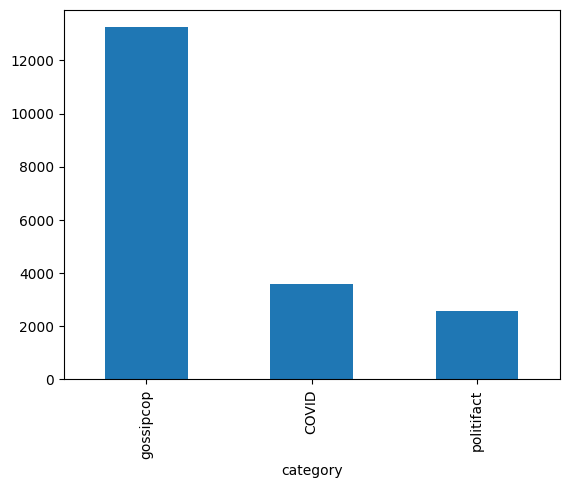

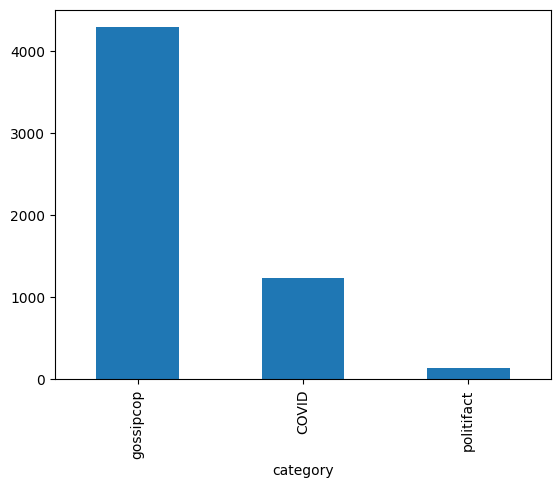

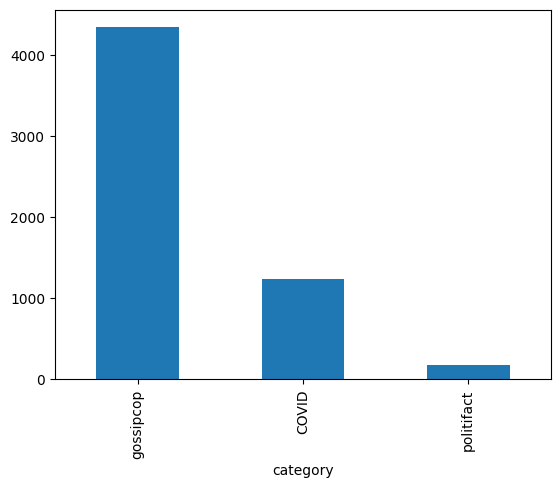

In [18]:
import matplotlib.pyplot as plt

train_data["category"].value_counts().plot(kind="bar")
plt.show()
val_data["category"].value_counts().plot(kind="bar")
plt.show()
test_data["category"].value_counts().plot(kind="bar")
plt.show()

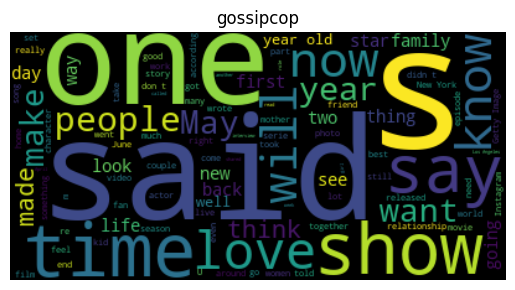

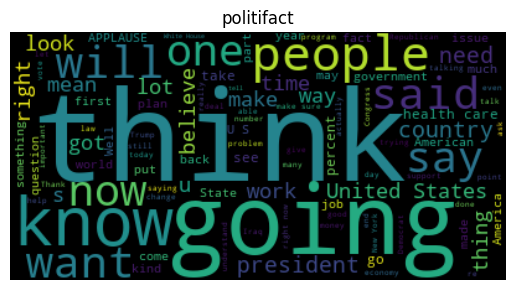

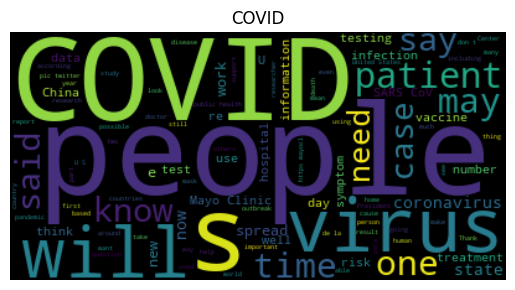

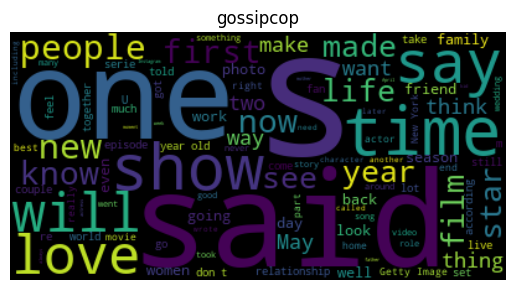

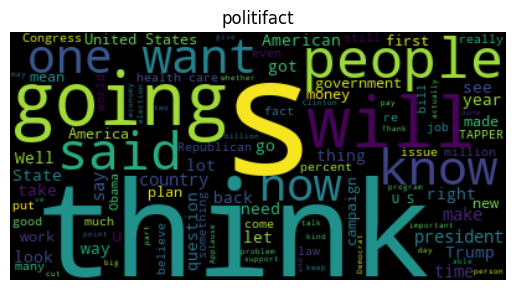

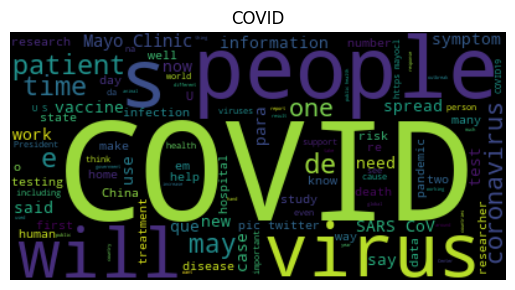

KeyboardInterrupt: 

In [20]:
from wordcloud import WordCloud

def show_wordcloud(data, category, data_name=""):
        content = " ".join(data[data["category"] == category]["content"])
        wordcloud = WordCloud(max_words=100).generate(content)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{data_name} {category} wordcloud")
        plt.show()


def show_wordcloud_for_dataset(data, data_name):
    categories = data["category"].unique()

    for category in categories:
        show_wordcloud(data, category)


show_wordcloud_for_dataset(train_data, "Train")
show_wordcloud_for_dataset(val_data, "Val")
show_wordcloud_for_dataset(test_data, "Test")

Show emotions distribution in each file

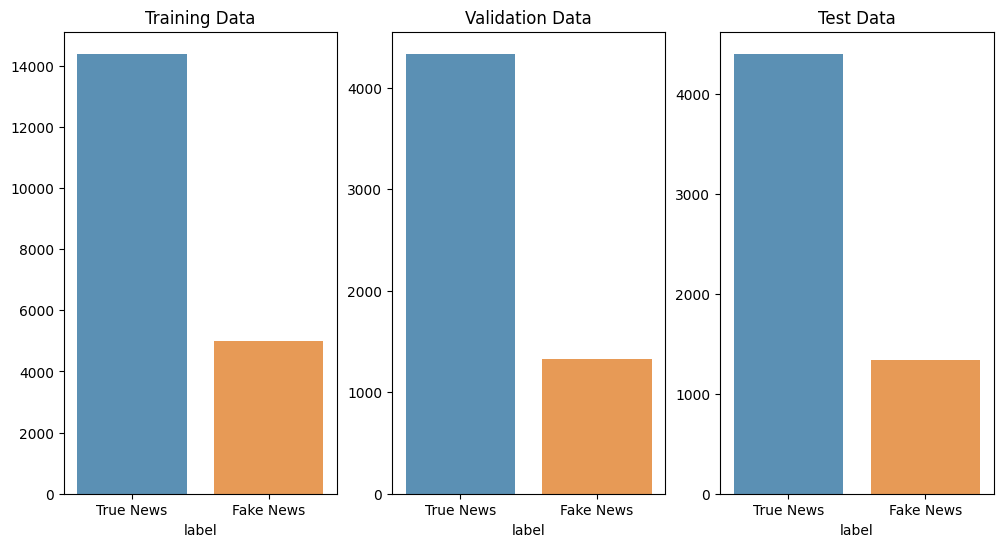

In [26]:
import seaborn as sns

train_counts = train_data['label'].value_counts().rename(index={0:'True News', 1:'Fake News'})
val_counts = val_data['label'].value_counts().rename(index={0:'True News', 1:'Fake News'})
test_counts = test_data['label'].value_counts().rename(index={0:'True News', 1:'Fake News'})

plt.figure(figsize=(12, 6))

plt.subplot(131)
sns.barplot(x=train_counts.index, y=train_counts.values, alpha=0.8)
plt.title('Training Data')

plt.subplot(132)
sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)
plt.title('Validation Data')

plt.subplot(133)
sns.barplot(x=test_counts.index, y=test_counts.values, alpha=0.8)
plt.title('Test Data')

plt.show()

Check duplicates

There are 3587 duplicate rows across the train, validation, and test sets.


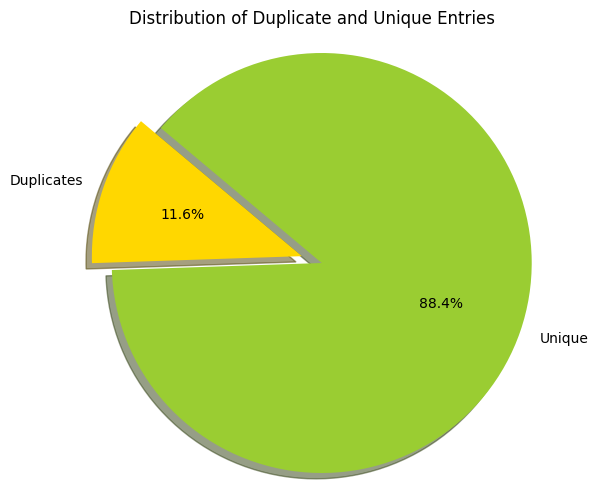

In [31]:
import numpy as np

all_data = pd.concat([train_data, val_data, test_data])

if 'label' in all_data.columns:
    all_data = all_data.drop(columns=['label'])

all_data = all_data.applymap(lambda x: str(x) if isinstance(x, (list, np.ndarray)) else x)

duplicate_rows = all_data.duplicated().sum()

print(f"There are {duplicate_rows} duplicate rows across the train, validation, and test sets.")


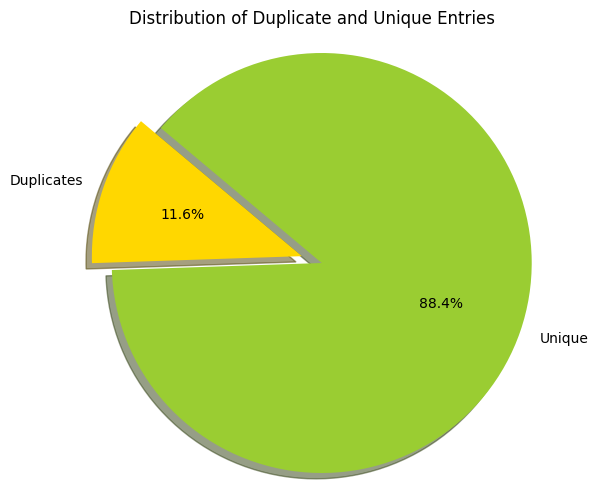

In [32]:
import matplotlib.pyplot as plt

unique_rows = len(all_data) - duplicate_rows

labels = 'Duplicates', 'Unique'
sizes = [duplicate_rows, unique_rows]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Distribution of Duplicate and Unique Entries')
plt.show()

In [34]:
def check_duplicates_within(df):
    df_without_label = df.drop(columns=['label'])
    df_without_label = df_without_label.applymap(lambda x: str(x) if isinstance(x, (list, np.ndarray)) else x)
    duplicate_rows = df_without_label.duplicated().sum()
    return duplicate_rows

def check_duplicates_across(df1, df2):
    df1_without_label = df1.drop(columns=['label'])
    df2_without_label = df2.drop(columns=['label'])
    df1_without_label = df1_without_label.applymap(lambda x: str(x) if isinstance(x, (list, np.ndarray)) else x)
    df2_without_label = df2_without_label.applymap(lambda x: str(x) if isinstance(x, (list, np.ndarray)) else x)
    duplicate_rows = pd.merge(df1_without_label, df2_without_label, how='inner').duplicated().sum()
    return duplicate_rows

# Check duplicates within datasets
train_duplicates = check_duplicates_within(train_data)
val_duplicates = check_duplicates_within(val_data)
test_duplicates = check_duplicates_within(test_data)

# Check duplicates across datasets
train_val_duplicates = check_duplicates_across(train_data, val_data)
train_test_duplicates = check_duplicates_across(train_data, test_data)
val_test_duplicates = check_duplicates_across(val_data, test_data)


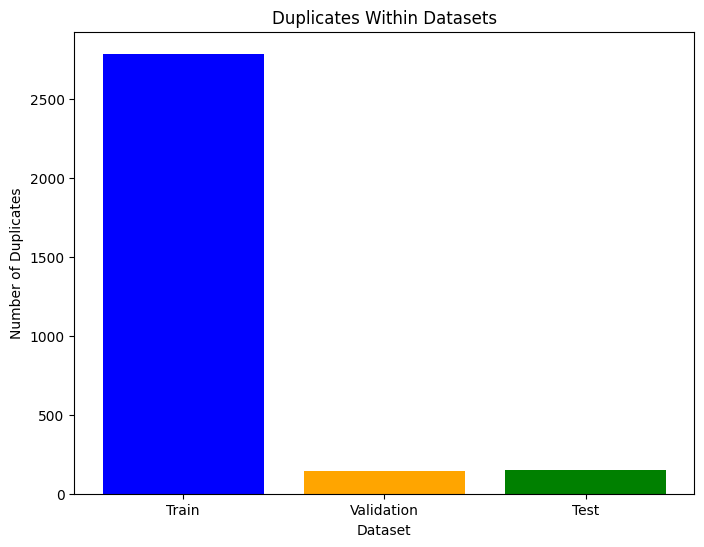

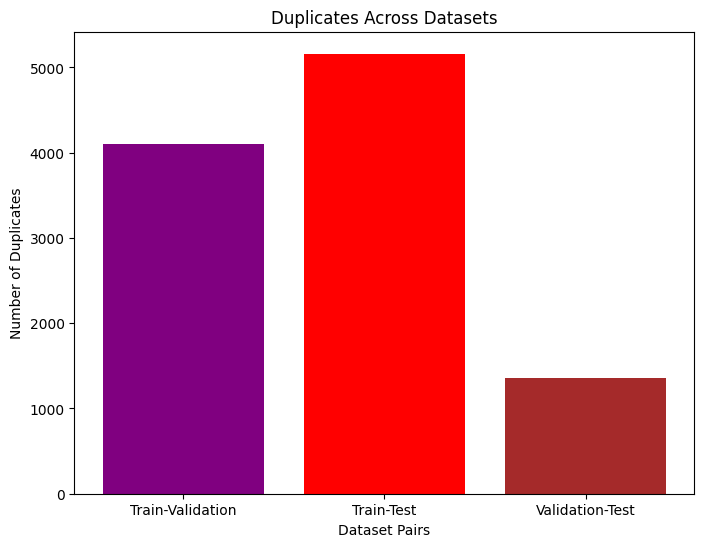

In [35]:
import matplotlib.pyplot as plt

# Duplicates within each dataset
labels = ['Train', 'Validation', 'Test']
values = [train_duplicates, val_duplicates, test_duplicates]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange', 'green'])
plt.title('Duplicates Within Datasets')
plt.xlabel('Dataset')
plt.ylabel('Number of Duplicates')
plt.show()

# Duplicates across different datasets
labels = ['Train-Validation', 'Train-Test', 'Validation-Test']
values = [train_val_duplicates, train_test_duplicates, val_test_duplicates]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['purple', 'red', 'brown'])
plt.title('Duplicates Across Datasets')
plt.xlabel('Dataset Pairs')
plt.ylabel('Number of Duplicates')
plt.show()


Visualize the data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Train data:


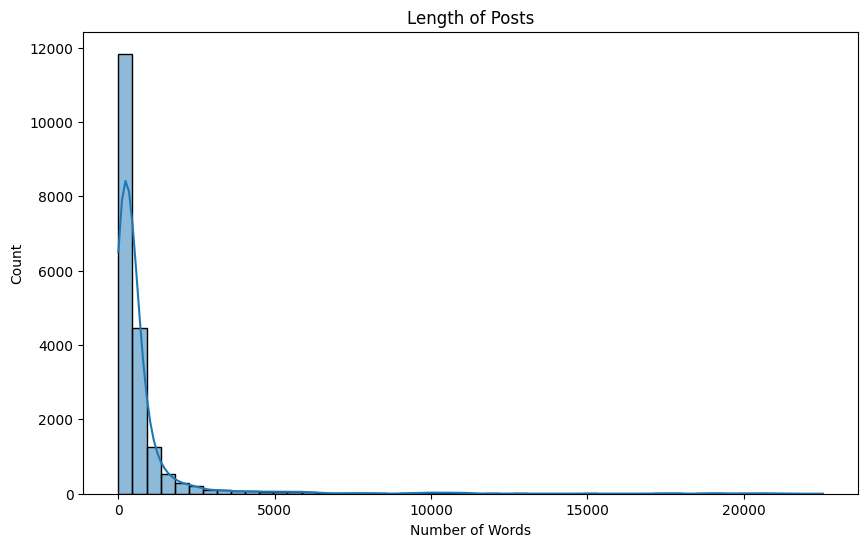

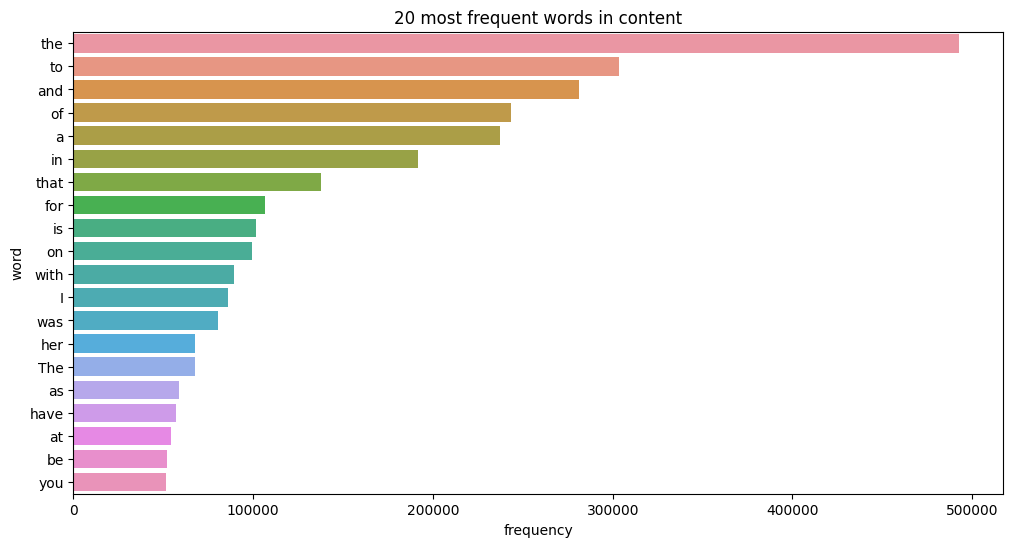

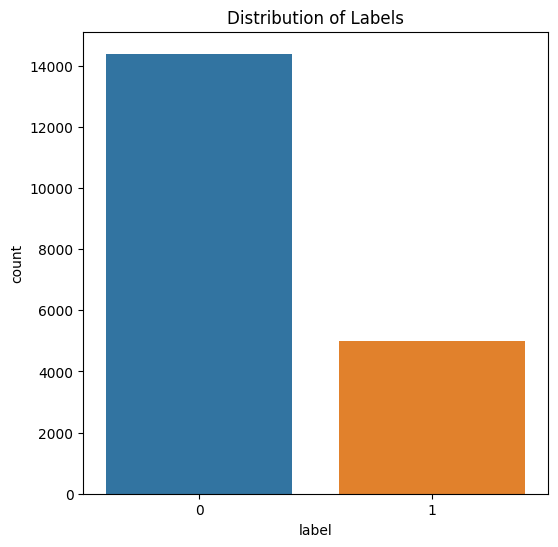

Number of unique categories: 3


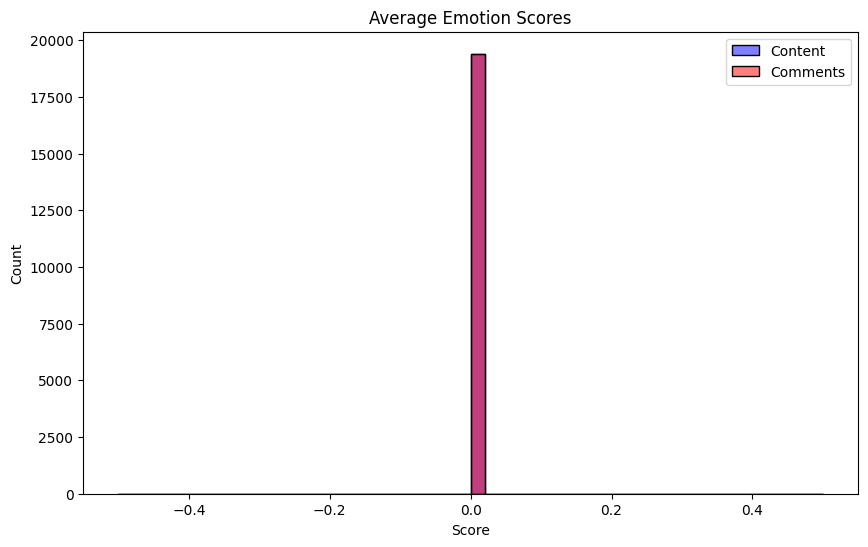

Val data:


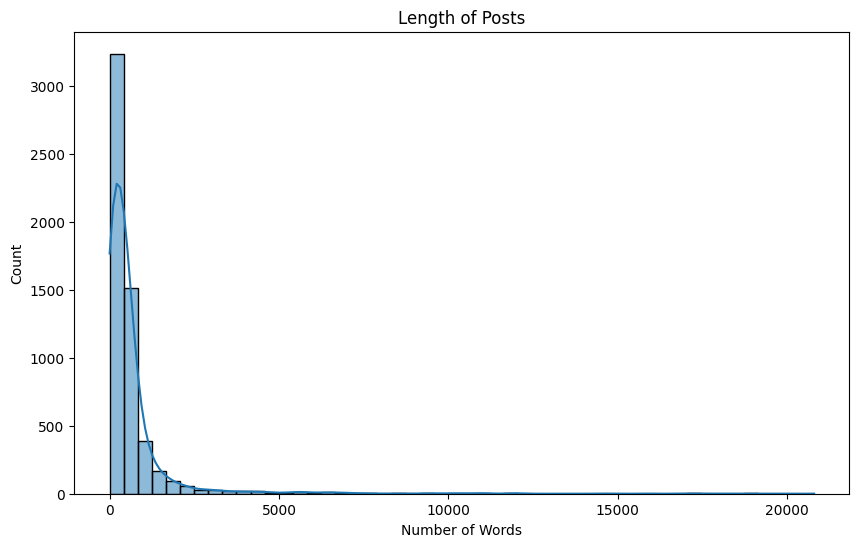

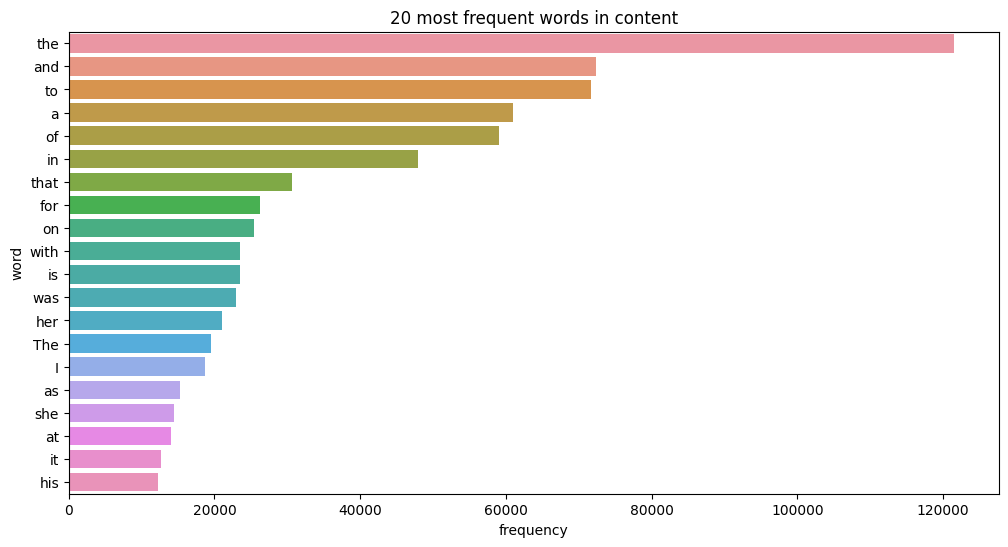

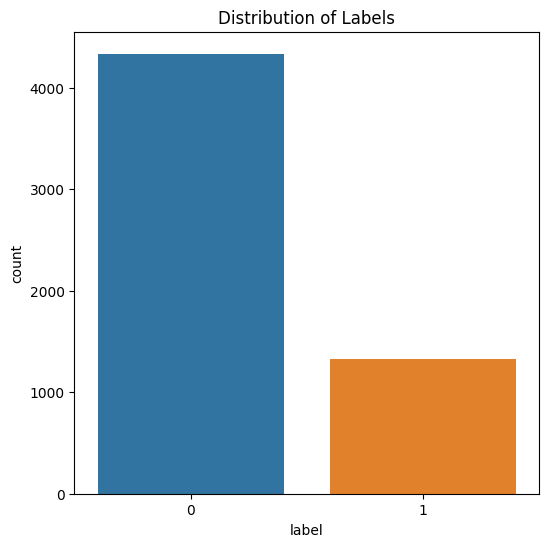

Number of unique categories: 3


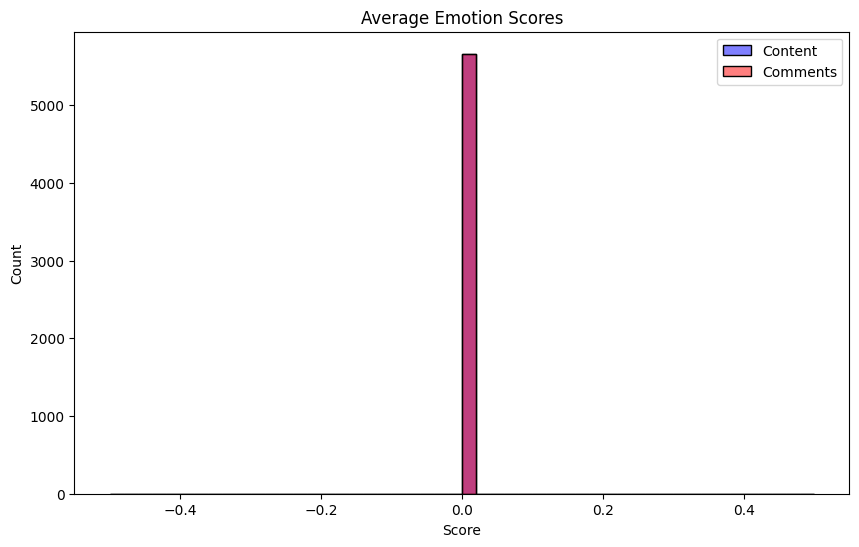

Test data:


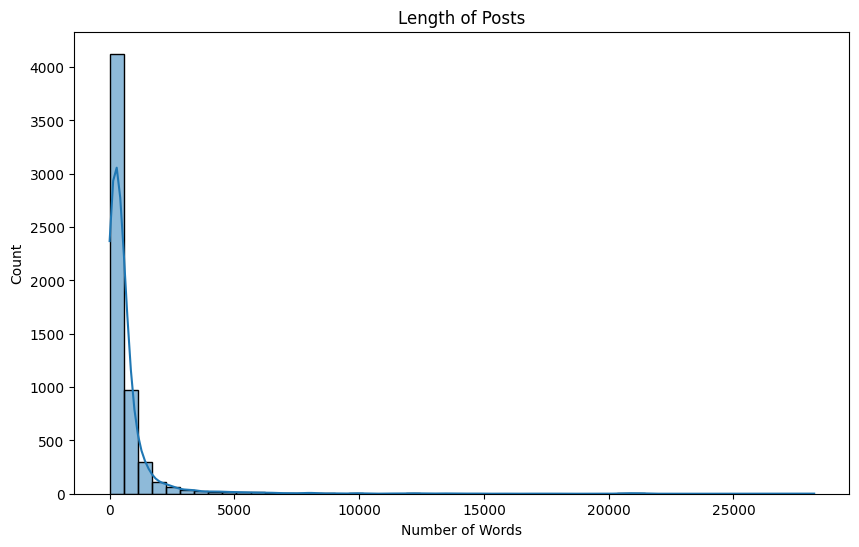

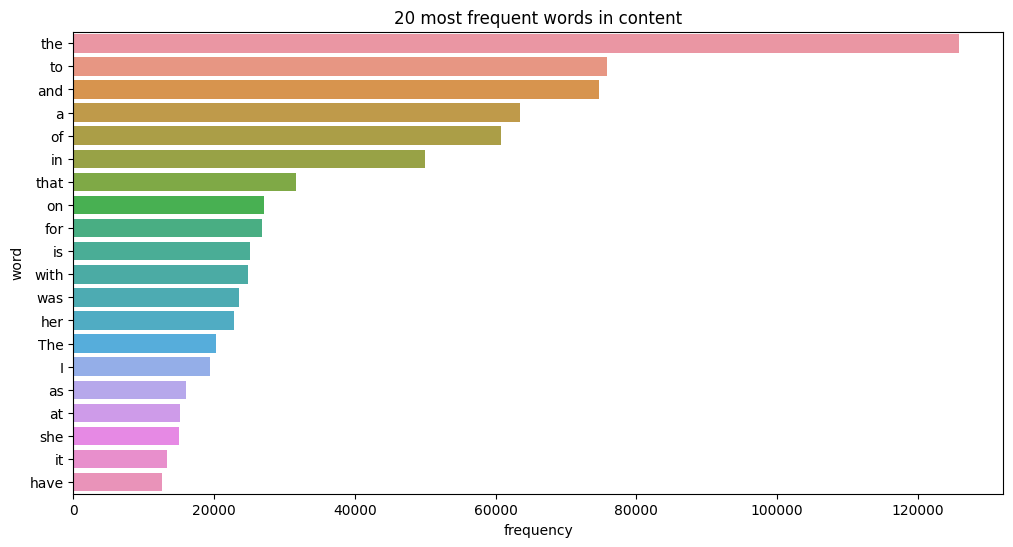

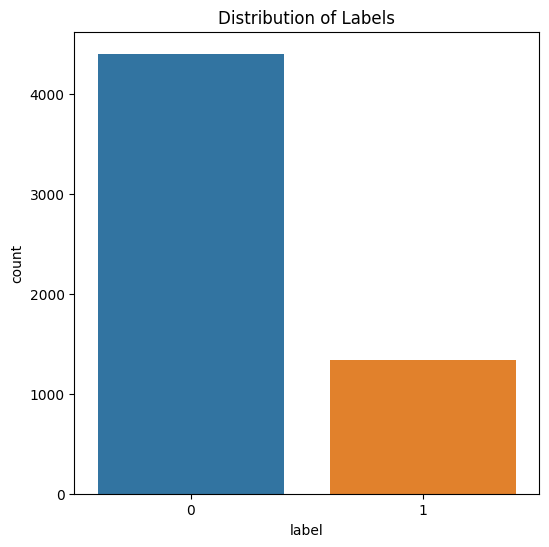

Number of unique categories: 3


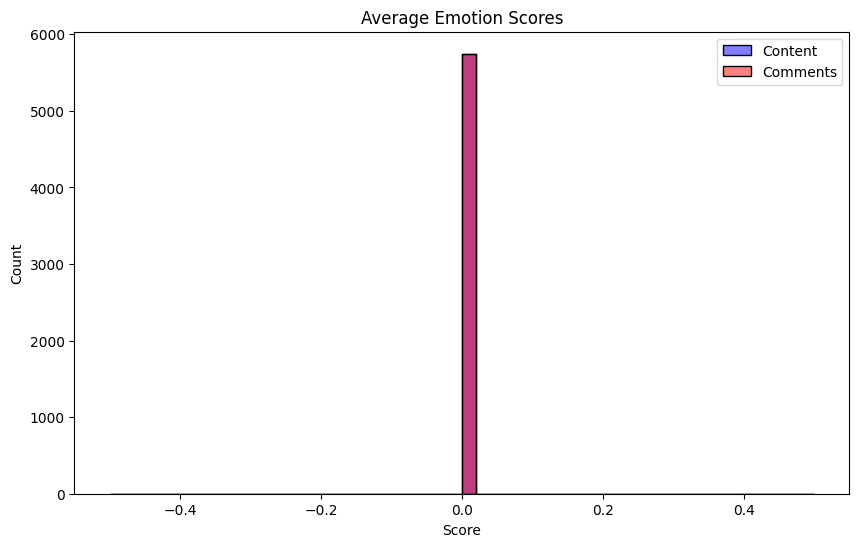

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def visualise_dataset(df):
    df['post_length'] = df['content'].apply(lambda x: len(word_tokenize(x)) if pd.notnull(x) and isinstance(x, str) else 0)

    plt.figure(figsize=(10, 6))
    sns.histplot(df['post_length'], bins=50, kde=True)
    plt.title('Length of Posts')
    plt.xlabel('Number of Words')
    plt.show()

    def plot_word_freq(df, column, n_most_common, title):
        words = ' '.join(df[df[column].apply(lambda x: pd.notnull(x) and isinstance(x, str))][column]).split()
        fdist = FreqDist(words)
        words_df = pd.DataFrame(fdist.most_common(n_most_common), 
                                columns=['word', 'frequency'])

        # Plotting
        plt.figure(figsize=(12, 6))
        sns.barplot(data=words_df, x='frequency', y='word')
        plt.title(title)
        plt.show()

    plot_word_freq(df, 'content', 20, '20 most frequent words in content')

    plt.figure(figsize=(6, 6))
    sns.countplot(x='label', data=df)
    plt.title('Distribution of Labels')
    plt.show()

    num_categories = df['category'].nunique()
    print(f'Number of unique categories: {num_categories}')

    df['avg_content_emotion'] = df['content_emotion'].apply(lambda x: sum(x)/len(x) if (x is not None and isinstance(x, list)) else 0)
    df['avg_comments_emotion'] = df['comments_emotion'].apply(lambda x: sum(x)/len(x) if (x is not None and isinstance(x, list)) else 0)


    plt.figure(figsize=(10, 6))
    sns.histplot(df['avg_content_emotion'], bins=50, kde=True, color='blue', label='Content')
    sns.histplot(df['avg_comments_emotion'], bins=50, kde=True, color='red', label='Comments')
    plt.title('Average Emotion Scores')
    plt.xlabel('Score')
    plt.legend()
    plt.show()


print("Train data:")
visualise_dataset(train_data)
print("Val data:")
visualise_dataset(val_data)
print("Test data:")
visualise_dataset(test_data)